In [537]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import random
import math
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
mem = Memory("./mycache")

@mem.cache
def get_train_data():
    data = load_svmlight_file("D:/python/machine_learning/a9a",123)
    return data[0],data[1]
def get_test_data():
    data = load_svmlight_file("D:/python/machine_learning/a9a.t",123)
    return data[0],data[1]
X_train,y_train = get_train_data()
X_test,y_test = get_test_data()

In [538]:
print(X_train.shape)

(32561, 123)


In [539]:
print(X_test.shape)

(16281, 123)


In [540]:
a = np.ones((X_train.shape[0],1))
b = np.ones((X_test.shape[0],1))
X_train = np.column_stack((X_train.toarray(),a))
X_test = np.column_stack((X_test.toarray(),b))

In [541]:
X_train.shape

(32561, 124)

In [542]:
X_test.shape

(16281, 124)

In [543]:
X_test

array([[ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.]])

In [544]:
X_train

array([[ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [545]:
y_train

array([-1., -1., -1., ..., -1., -1.,  1.])

In [546]:
select_random= random.sample(range(X_train.shape[0]),100)

In [547]:
len(select_random)

100

In [548]:
X_train[2].shape

(124,)

In [549]:
for i in range(y_test.shape[0]):
    if y_test[i] ==(-1):
        y_test[i]=0
for i in range(y_train.shape[0]):
    if y_train[i] ==(-1):
        y_train[i]=0

In [550]:
def hfunction(xi,w):
    return 1/(1+math.exp((-1)*np.dot((w.T),xi)))

In [551]:
def loss_function(x,y,w):
    loss=0
    for i in range(x.shape[0]):
        hx=hfunction(x[i],w)
        loss+=(y[i]*math.log(hx)+(1-y[i])*math.log(1-hx))
    return -(1/x.shape[0])*loss

In [552]:
def descent_function(x,y,w,select_random):
    #123个属性，+1
    gt=np.zeros((124,))
    for i in select_random:
        hx=hfunction(x[i],w)
        gt+=(hx-y[i])*x[i]
    return (1/len(select_random))*gt

In [553]:
def SGD(sgd_rate):
    global sgd_w
    sgd_gt=descent_function(X_train,y_train,sgd_w,select_random)
    sgd_w=sgd_w-sgd_rate*sgd_gt
    sgd_loss_train.append(loss_function(X_train,y_train,sgd_w))
    sgd_loss_test.append(loss_function(X_test,y_test,sgd_w))

In [554]:
def NAG(nga_yta,nag_rate):
    global nag_w
    global v
    v=nga_yta*v+nag_rate*descent_function(X_train,y_train,nag_w-nga_yta*v,select_random)
    nag_w=nag_w-v
    nag_loss_train.append(loss_function(X_train,y_train,nag_w))
    nag_loss_test.append(loss_function(X_test,y_test,nag_w))

In [555]:
def RMSProp(rmsp_yta):
    global rmsp_w
    global RMS_Gt_eta
    global RMS_Gt
    gt=descent_function(X_train,y_train,rmsp_w,select_random)
    RMS_Gt=rmsp_yta*RMS_Gt+(1-rmsp_yta)*np.square(gt)
    RMS_Gt_eta=RMS_Gt+eta
    for i in range(RMS_Gt.shape[0]):
        RMS_Gt_eta[i]=rmsp_rate/math.sqrt(RMS_Gt_eta[i])
    rmsp_w=rmsp_w-RMS_Gt_eta*gt
    rmsp_loss_train.append(loss_function(X_train,y_train,rmsp_w))
    rmsp_loss_test.append(loss_function(X_test,y_test,rmsp_w))

In [556]:
def AdaDelta(adadel_yta):
    global adadel_w
    global Adadel_Gt_eta
    global Adadel_Gt
    global Adadel_t_eta
    global Adadel_t
    gt=descent_function(X_train,y_train,adadel_w,select_random)
    Adadel_Gt=adadel_yta*Adadel_Gt+(1-adadel_yta)*np.square(gt)
    Adadel_Gt_eta=Adadel_Gt+eta
    Adadel_t_eta=Adadel_t+eta
    for i in range(Adadel_Gt.shape[0]):
        Adadel_Gt_eta[i]=-((math.sqrt(Adadel_t_eta[i]))/(math.sqrt(Adadel_Gt_eta[i])))
    delta_w=Adadel_Gt_eta*gt
    adadel_w=adadel_w+delta_w
    Adadel_t=adadel_yta*Adadel_t+(1-adadel_yta)*np.square(delta_w)
    adadel_loss_train.append(loss_function(X_train,y_train,adadel_w))
    adadel_loss_test.append(loss_function(X_test,y_test,adadel_w))

In [557]:
def Adam(bta,adam_yta):
    global k
    global m
    global adam_w
    global Adam_Gt_eta
    global Adam_Gt
    gt=descent_function(X_train,y_train,adam_w,select_random)
    m=bta*m+(1-bta)*gt
    Adam_Gt=adam_yta*Adam_Gt+(1-adam_yta)*np.square(gt)
    Adam_Gt_eta=Adam_Gt+eta
    for i in range(Adam_Gt.shape[0]):
        Adam_Gt_eta[i]=m[i]/(math.sqrt(Adam_Gt_eta[i]))
    alpha= adam_rate*((math.sqrt(1-math.pow(adam_yta,k)))/(math.sqrt(1-math.pow(bta,k))))
    adam_w=adam_w-alpha*Adam_Gt_eta
    adam_loss_train.append(loss_function(X_train,y_train,adam_w))
    adam_loss_test.append(loss_function(X_test,y_test,adam_w))

In [558]:
sgd_loss_train=[]
sgd_loss_test=[]
nag_loss_train=[]
nag_loss_test=[]
rmsp_loss_train=[]
rmsp_loss_test=[]
adadel_loss_train=[]
adadel_loss_test=[]
adam_loss_train=[]
adam_loss_test=[]

sgd_w=np.zeros((124,))
nag_w=np.zeros((124,))
rmsp_w=np.zeros((124,))
adadel_w=np.zeros((124,))
adam_w=np.zeros((124,))

eta=10**(-8)

sgd_rate=0.001
nag_rate=0.001
rmsp_rate=0.001
adadel_rate=0.001
adam_rate=0.001

nga_yta=0.9
rmsp_yta=0.9
adadel_yta=0.95
adam_yta=0.999

RMS_Gt=np.zeros((124,))
RMS_Gt_eta=np.zeros((124,))
Adadel_Gt=np.zeros((124,))
Adadel_Gt_eta=np.zeros((124,))
Adadel_t=np.zeros((124,))
Adadel_t_eta=np.zeros((124,))
m=np.zeros((124,))
Adam_Gt=np.zeros((124,))
Adam_Gt_eta=np.zeros((124,))
bta=0.9
v=np.zeros((124,))

k=0
for i in range(1000):
    k+=1
    print(k) 
    SGD(sgd_rate)
    NAG(nga_yta,nag_rate)
    RMSProp(rmsp_yta)
    AdaDelta(adadel_yta)
    Adam(bta,adam_yta)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


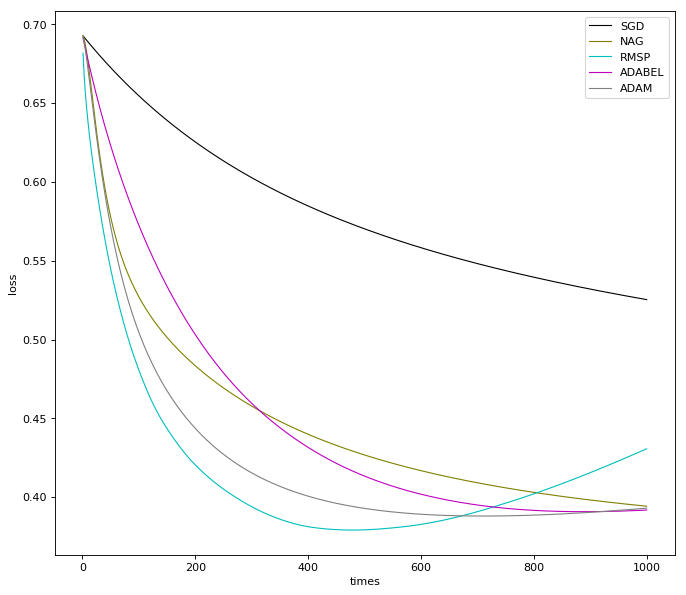

In [559]:
# display diagram of the result
x = []
for i in range(1000):
    x.append(i+1)
plt.figure(figsize=(10,9), dpi=80)
l1,=plt.plot(x, sgd_loss_test, color='black', linewidth=1.0)
l2,=plt.plot(x, nag_loss_test, color='olive', linewidth=1.0)
l3,=plt.plot(x, rmsp_loss_test, color='c', linewidth=1.0)
l4,=plt.plot(x,  adadel_loss_test, color='m', linewidth=1.0)
l5,=plt.plot(x, adam_loss_test, color='gray', linewidth=1.0)
plt.xlabel('times')
plt.ylabel('loss')
plt.legend(handles=[l1, l2,l3,l4,l5], labels=['SGD', 'NAG','RMSP', 'ADABEL','ADAM'],  loc='best')
#plt.legend(loc='upper right')
plt.show()